In [37]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping tools
import requests
from bs4 import BeautifulSoup

# Regular expressions for pattern matching and text extraction
import re

In [88]:
# Generate a list of Amazon laptop search URLs by looping through combinations of page and reference numbers for scraping multiple result pages.

urls = []

for i in range(1, 21):  # i = 1, 2, 3
    for j in range(1, 21):  # j = 1, 2, 3
        url = f"https://www.amazon.in/s?k=laptops&page={i}&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C259&ref=sr_pg_{j}"
        urls.append(url)

# print to verify
for u in urls:
# Set custom headers to mimic a real browser and avoid request blocking during web scraping    print(u)

https://www.amazon.in/s?k=laptops&page=1&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C259&ref=sr_pg_1
https://www.amazon.in/s?k=laptops&page=1&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C259&ref=sr_pg_2
https://www.amazon.in/s?k=laptops&page=1&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C259&ref=sr_pg_3
https://www.amazon.in/s?k=laptops&page=1&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C259&ref=sr_pg_4
https://www.amazon.in/s?k=laptops&page=1&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C259&ref=sr_pg_5
https://www.amazon.in/s?k=laptops&page=1&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C259&ref=sr_pg_6
https://www.amazon.in/s?k=laptops&page=1&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C259&ref=sr_pg_7
https://www.amazon.in/s?k=laptops&page=1&xpid=tnKllYPkuVHCK&crid=19S5OMAVBPGRA&qid=1760519631&sprefix=%2Caps%2C

In [89]:
# Set custom headers to mimic a real browser and avoid request blocking during web scraping.

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    }

In [90]:
# Send an HTTP GET request to the first Amazon URL using custom headers to retrieve the HTML content for scraping.

requests.get(urls[0],headers=headers)

<Response [200]>

In [91]:
# Initialize empty lists to store extracted laptop specifications and metadata for each product scraped from Amazon.

laptop_info=[]
new_info=[]
laptop_name=[]
model_name=[]
laptop_gen=[]
ram=[]
rom=[]
color=[]
weight_in_kg=[]
core=[]
price=[]
rating=[]
display=[]
os=[]

In [92]:
"""Loop through each Amazon laptop search URL, send a GET request, parse the HTML content,and extract structured product details such as brand, model, generation, RAM, storage, color,
weight, processor, display size, operating system, review count, price, and rating using regex and HTML tags."""

for link in urls:
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36",
        "Accept-Language": "en-US,en;q=0.9",
    }

    response = requests.get(link, headers=headers)
    data = BeautifulSoup(response.content, "html.parser")

    for i in data.find_all("div", class_="sg-col-inner"):
        a = i.find("h2")
        if a and a.has_attr("aria-label"):
            product_name = a["aria-label"].replace("Sponsored Ad - ", "").strip()
            laptop_info.append(product_name)

            # Brand name
            name = re.findall(r'^(?P<brand>[A-Z][A-Za-z&®™\-]{1,20})', product_name)
            
            laptop_name.append(name[0] if name else np.nan)

            # Model name
            
            model = re.findall(r'^(?:Sponsored Ad - )?[A-Z][a-zA-Z&®™\-]{2,20}\s+((?:[A-Za-z0-9\-]+(?:\s+|$)){1,4})',product_name)
           
            model_name.append(model[0] if model else np.nan)

            # Generation
            gen = re.findall(r'\b\d{1,2}(?:st|nd|rd|th)\s+Gen\b', product_name, re.IGNORECASE)
            
            laptop_gen.append(gen[0] if gen else np.nan)

            # RAM
            ram_ = re.findall(r'(\d+\s*GB\s*(?:RAM|LPDDR\d|DDR\d)?)', product_name)
            
            ram.append(ram_[0] if ram_ else np.nan)

            # ROM
            rom_ = re.findall(r'(\d+\s*GB\s*(?:SSD|eMMC|HDD))', product_name)
            
            rom.append(rom_[0] if rom_ else np.nan)

            # Color
            color_ = re.findall(r'\b(Black|White|Silver|Grey|Gray|Blue|Gold|Green|Red|Pink|Purple|Brown|Beige|Yellow|Orange)\b', product_name)
            
            color.append(color_[0] if color_ else np.nan)

            # Weight
            weight = re.findall(r'(\d+(?:\.\d+)?)\s*(?:kg|KG)', product_name)
           
            weight_in_kg.append(weight[0] if weight else np.nan)

            # Processor/Core
            # core_ = re.findall(r'(Intel\s+Core\s+i\d|AMD\s+Ryzen\s+\d|Intel\s+Celeron|AMD\s+Athlon(?:\s+Silver)?)', product_name)
            core_ = re.findall(r'(Intel\s+(?:Core\s+i\d{1,2}|Celeron|Pentium|Ultra\s+\d{1,3})|AMD\s+(?:Ryzen\s+\d{1,2}|Athlon(?:\s+Silver)?|Radeon)|MediaTek\s+Helio\s+\w+)', product_name, re.IGNORECASE)
            core.append(core_[0] if core_ else np.nan)
            # Display Size
            display_ = re.findall(r'(\d{1,2}\.?\d{0,2})\s*(?:\"|inch|inches|cm)', product_name, re.IGNORECASE)
            display.append(display_[0] if display_ else np.nan)
           

            #os
            os_ = re.findall(r'(Windows\s+\d{1,2}(?:\s+Home|Pro)?|Chrome\s+OS|Android\s+\d{1,2})', product_name, re.IGNORECASE)
            os.append(os_[0] if os_ else np.nan)

    
            
            # Review count
            b = i.find("span", class_="a-size-base s-underline-text")
            review.append(b.text.strip() if b else np.nan)

            # Price
            c = i.find("span", class_="a-price-whole")
            value = f"{c.text.strip()}" if c else np.nan
            price.append(value)

            # Rating
            d = i.find("span", class_="a-icon-alt")
            rating_out_5.append(d.text.strip() if d else np.nan)
            if d:
                r_value = re.findall(r"\d\.\d", d.text)
                rating.append(r_value[0] if r_value else np.nan)
            else:
                rating.append(np.nan)

In [93]:
len(model_name)

10797

In [94]:
len(display)

10797

In [108]:
# Create a dictionary to organize all extracted laptop attributes into structured key-value pairs for DataFrame conversion

data={
    
    "Laptop_Name":laptop_name,
    "Model_Name":model_name,
    "Laptop_Gen":laptop_gen,
    "Ram":ram,
    "Rom":rom,
    "Color":color,
    "Weight_In_Kg":weight_in_kg,
    "Core":core,
    "Price":price,
    "Rating":rating,
    "Display_Size":display,
    "OS":os
    
}

In [109]:
# Convert the structured dictionary of laptop attributes into a pandas DataFrame for analysis and visualization
df1 = pd.DataFrame(data)

In [110]:
df1

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,Dell,Inspiron,NaN,8GB RAM,512GB SSD,Black,NaN,AMD Ryzen 3,"29,990",4.0,15.6,Windows 11 Home
1,Dell,15 Intel Core i5,13th Gen,16GB DDR4,512GB SSD,Grey,1.66,Intel Core i5,"57,990",3.5,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"34,500",4.6,15.6,Windows 11
3,Lenovo,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"25,979",4.1,15.6,Windows 11
4,NaN,NaN,NaN,16 GB RAM,512GB SSD,Gray,1.59,AMD Ryzen 3,"28,890",3.8,15.6,Windows 11 Home
...,...,...,...,...,...,...,...,...,...,...,...,...
10792,Primebook,2 Neo 2025,NaN,6GB RAM,NaN,NaN,NaN,MediaTek Helio G99,"14,990",4.5,NaN,Android 15
10793,Dell,NaN,13th Gen,16GB DDR4,NaN,Grey,NaN,Intel Core i3,"40,990",3.7,15.6,Windows 11
10794,Dell,Inspiron,NaN,8GB RAM,512GB SSD,Black,NaN,AMD Ryzen 3,"29,990",4.0,15.6,Windows 11 Home
10795,Aropana,Vegan Leather Desk Mat,NaN,NaN,NaN,Blue,NaN,NaN,599,4.4,13.8,NaN


In [116]:
valid_brands = [
    'Dell', 'HP', 'Lenovo', 'Acer', 'ASUS', 'MSI', 'Apple', 'Samsung',
    'Chuwi', 'JioBook', 'ULTIMUS', 'Primebook', 'Microsoft', 'Lapcare',
    'Avita', 'Infinix', 'iBall'
]
df2 = df1[df1['Laptop_Name'].isin(valid_brands)]
df2.reset_index(drop=True, inplace=True)

In [117]:
df2

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,Dell,Inspiron,NaN,8GB RAM,512GB SSD,Black,NaN,AMD Ryzen 3,"29,990",4.0,15.6,Windows 11 Home
1,Dell,15 Intel Core i5,13th Gen,16GB DDR4,512GB SSD,Grey,1.66,Intel Core i5,"57,990",3.5,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"34,500",4.6,15.6,Windows 11
3,Lenovo,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"25,979",4.1,15.6,Windows 11
4,Dell,SmartChoice,13th Gen,6GB,NaN,Grey,NaN,Intel Core i5,"77,490",4.0,15.6,Windows 11
...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Primebook,2 Max 2025,NaN,8GB RAM,NaN,Gray,NaN,MediaTek Helio G99,"19,990",4.4,NaN,Android 15
6014,Primebook,2 Pro 2025,NaN,8GB RAM,NaN,Gray,NaN,MediaTek Helio G99,"17,990",4.5,NaN,Android 15
6015,Primebook,2 Neo 2025,NaN,6GB RAM,NaN,NaN,NaN,MediaTek Helio G99,"14,990",4.5,NaN,Android 15
6016,Dell,NaN,13th Gen,16GB DDR4,NaN,Grey,NaN,Intel Core i3,"40,990",3.7,15.6,Windows 11


In [125]:
# Save the extracted laptop data to a CSV file for future analysis or sharing
df2.to_csv("Extracted_Amazon_Laptop_Data.csv",index=False)

In [180]:
# Load the extracted Amazon laptop data from a CSV file into a pandas DataFrame for further analysis

df = pd.read_csv("Extracted_Amazon_Laptop_Data.csv")

In [181]:
df

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,Dell,Inspiron,NaN,8GB RAM,512GB SSD,Black,NaN,AMD Ryzen 3,"29,990",4.0,15.6,Windows 11 Home
1,Dell,15 Intel Core i5,13th Gen,16GB DDR4,512GB SSD,Grey,1.66,Intel Core i5,"57,990",3.5,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"34,500",4.6,15.6,Windows 11
3,Lenovo,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"25,979",4.1,15.6,Windows 11
4,Dell,SmartChoice,13th Gen,6GB,NaN,Grey,NaN,Intel Core i5,"77,490",4.0,15.6,Windows 11
...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Primebook,2 Max 2025,NaN,8GB RAM,NaN,Gray,NaN,MediaTek Helio G99,"19,990",4.4,NaN,Android 15
6014,Primebook,2 Pro 2025,NaN,8GB RAM,NaN,Gray,NaN,MediaTek Helio G99,"17,990",4.5,NaN,Android 15
6015,Primebook,2 Neo 2025,NaN,6GB RAM,NaN,NaN,NaN,MediaTek Helio G99,"14,990",4.5,NaN,Android 15
6016,Dell,NaN,13th Gen,16GB DDR4,NaN,Grey,NaN,Intel Core i3,"40,990",3.7,15.6,Windows 11


In [182]:
# Remove duplicate rows to ensure each laptop entry is unique

df.drop_duplicates(inplace=True)

In [183]:
df.reset_index(drop=True, inplace=True)

In [184]:
df

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,Dell,Inspiron,NaN,8GB RAM,512GB SSD,Black,NaN,AMD Ryzen 3,"29,990",4.0,15.6,Windows 11 Home
1,Dell,15 Intel Core i5,13th Gen,16GB DDR4,512GB SSD,Grey,1.66,Intel Core i5,"57,990",3.5,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"34,500",4.6,15.6,Windows 11
3,Lenovo,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"25,979",4.1,15.6,Windows 11
4,Dell,SmartChoice,13th Gen,6GB,NaN,Grey,NaN,Intel Core i5,"77,490",4.0,15.6,Windows 11
...,...,...,...,...,...,...,...,...,...,...,...,...
217,Dell,15 Laptop,NaN,16GB DDR4,512GB SSD,Silver,NaN,Intel Core i5,"54,200",4.4,NaN,Windows 11 Home
218,ASUS,Vivobook,NaN,16GB RAM,512GB SSD,Silver,1.88,Intel Core i5,"51,490",4.1,16.0,Windows 11
219,Microsoft,New Surface,NaN,NaN,NaN,NaN,NaN,NaN,"1,55,799",4.1,13.0,Windows 11 Home
220,Acer,Aspire,13th Gen,16GB RAM,NaN,Gray,1.45,Intel Core i5,"45,990",4.2,14.0,Windows 11 Home


In [185]:
# Standardize brand names by stripping whitespace and converting to uppercase
df['Laptop_Name'] = df['Laptop_Name'].str.strip().str.upper()


In [186]:
df

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,DELL,Inspiron,NaN,8GB RAM,512GB SSD,Black,NaN,AMD Ryzen 3,"29,990",4.0,15.6,Windows 11 Home
1,DELL,15 Intel Core i5,13th Gen,16GB DDR4,512GB SSD,Grey,1.66,Intel Core i5,"57,990",3.5,15.6,Windows 11
2,HP,NaN,NaN,16GB RAM,512GB SSD,NaN,NaN,NaN,"34,500",4.6,15.6,Windows 11
3,LENOVO,V15 G4 AMD Athlon,NaN,8GB LPDDR5,512 GB SSD,Silver,NaN,AMD Athlon Silver,"25,979",4.1,15.6,Windows 11
4,DELL,SmartChoice,13th Gen,6GB,NaN,Grey,NaN,Intel Core i5,"77,490",4.0,15.6,Windows 11
...,...,...,...,...,...,...,...,...,...,...,...,...
217,DELL,15 Laptop,NaN,16GB DDR4,512GB SSD,Silver,NaN,Intel Core i5,"54,200",4.4,NaN,Windows 11 Home
218,ASUS,Vivobook,NaN,16GB RAM,512GB SSD,Silver,1.88,Intel Core i5,"51,490",4.1,16.0,Windows 11
219,MICROSOFT,New Surface,NaN,NaN,NaN,NaN,NaN,NaN,"1,55,799",4.1,13.0,Windows 11 Home
220,ACER,Aspire,13th Gen,16GB RAM,NaN,Gray,1.45,Intel Core i5,"45,990",4.2,14.0,Windows 11 Home


In [187]:
df['Ram'].unique()

array(['8GB RAM', '16GB DDR4', '16GB RAM', '8GB LPDDR5', '6GB',
       '8GB DDR4', '8 GB RAM', '12GB DDR4', '16GB DDR5', '16GB LPDDR5',
       '16 GB', '4GB', '4GB ', '16GB', '32GB RAM', '4GB RAM', '8 GB',
       '16 GB LPDDR5', '6GB RAM', '6GB ', '6GB DDR6', '4 GB', '8GB',
       '24 GB', '32 GB', '8GB ', '12GB RAM', '8 GB LPDDR4', '16GB ',
       '24GB RAM', nan, '32GB', '32 GB ', '24GB DDR4', '16 GB RAM'],
      dtype=object)

In [188]:
df['Ram'] = df['Ram'].replace({
    '8GB RAM': '8 GB',
    '16GB DDR4': '16 GB',
    '16GB RAM': '16 GB',
    '8GB LPDDR5': '8 GB',
    '6GB': '6 GB',
    '8GB DDR4': '8 GB',
    '8 GB RAM': '8 GB',
    '12GB DDR4': '12 GB',
    '16GB DDR5': '16 GB',
    '16GB LPDDR5': '16 GB',
    '16 GB': '16 GB',
    '4GB': '4 GB',
    '4GB ': '4 GB',
    '16GB': '16 GB',
    '32GB RAM': '32 GB',
    '4GB RAM': '4 GB',
    '8 GB': '8 GB',
    '16 GB LPDDR5': '16 GB',
    '6GB RAM': '6 GB',
    '6GB ': '6 GB',
    '6GB DDR6': '6 GB',
    '4 GB': '4 GB',
    '8GB': '8 GB',
    '24 GB': '24 GB',
    '32 GB': '32 GB',
    '8GB ': '8 GB',
    '12GB RAM': '12 GB',
    '8 GB LPDDR4': '8 GB',
    '16GB ': '16 GB',
    '24GB RAM': '24 GB',
    '32GB': '32 GB',
    '32 GB ': '32 GB',
    '24GB DDR4': '24 GB',
    '16 GB RAM': '16 GB'
})

In [189]:
df['Rom'].unique()

array(['512GB SSD', '512 GB SSD', nan, '64GB eMMC', '256 GB SSD',
       '128 GB SSD', '128GB eMMC', '256GB SSD'], dtype=object)

In [190]:
df['Rom'] = df['Rom'].replace({
    '512GB SSD': '512 GB',
    '512 GB SSD': '512 GB',
    '64GB eMMC': '64 GB',
    '256 GB SSD': '256 GB',
    '128 GB SSD': '128 GB',
    '128GB eMMC': '128 GB',
    '256GB SSD': '256 GB',
    '512GB': '512 GB',
    '256GB': '256 GB',
    '128GB': '128 GB',
    '64GB': '64 GB'
})

In [191]:
df

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,DELL,Inspiron,NaN,8 GB,512 GB,Black,NaN,AMD Ryzen 3,"29,990",4.0,15.6,Windows 11 Home
1,DELL,15 Intel Core i5,13th Gen,16 GB,512 GB,Grey,1.66,Intel Core i5,"57,990",3.5,15.6,Windows 11
2,HP,NaN,NaN,16 GB,512 GB,NaN,NaN,NaN,"34,500",4.6,15.6,Windows 11
3,LENOVO,V15 G4 AMD Athlon,NaN,8 GB,512 GB,Silver,NaN,AMD Athlon Silver,"25,979",4.1,15.6,Windows 11
4,DELL,SmartChoice,13th Gen,6 GB,NaN,Grey,NaN,Intel Core i5,"77,490",4.0,15.6,Windows 11
...,...,...,...,...,...,...,...,...,...,...,...,...
217,DELL,15 Laptop,NaN,16 GB,512 GB,Silver,NaN,Intel Core i5,"54,200",4.4,NaN,Windows 11 Home
218,ASUS,Vivobook,NaN,16 GB,512 GB,Silver,1.88,Intel Core i5,"51,490",4.1,16.0,Windows 11
219,MICROSOFT,New Surface,NaN,NaN,NaN,NaN,NaN,NaN,"1,55,799",4.1,13.0,Windows 11 Home
220,ACER,Aspire,13th Gen,16 GB,NaN,Gray,1.45,Intel Core i5,"45,990",4.2,14.0,Windows 11 Home


In [192]:
# Remove commas from price strings
df['Price'] = df['Price'].str.replace(',', '')

# Convert cleaned strings to integers
df['Price'] = df['Price'].astype(float)

In [193]:
df.dtypes

Laptop_Name      object
Model_Name       object
Laptop_Gen       object
Ram              object
Rom              object
Color            object
Weight_In_Kg    float64
Core             object
Price           float64
Rating          float64
Display_Size    float64
OS               object
dtype: object

In [194]:
df['OS'] = df['OS'].replace({'Windows 11 Home':'Windows 11'})

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop_Name   222 non-null    object 
 1   Model_Name    147 non-null    object 
 2   Laptop_Gen    84 non-null     object 
 3   Ram           186 non-null    object 
 4   Rom           144 non-null    object 
 5   Color         188 non-null    object 
 6   Weight_In_Kg  79 non-null     float64
 7   Core          142 non-null    object 
 8   Price         222 non-null    float64
 9   Rating        210 non-null    float64
 10  Display_Size  174 non-null    float64
 11  OS            130 non-null    object 
dtypes: float64(4), object(8)
memory usage: 20.9+ KB


In [196]:
df.isna().sum()

Laptop_Name       0
Model_Name       75
Laptop_Gen      138
Ram              36
Rom              78
Color            34
Weight_In_Kg    143
Core             80
Price             0
Rating           12
Display_Size     48
OS               92
dtype: int64

In [208]:
# Fill missing values in categorical columns using brand-wise mode.
# If a brand group has no non-null values, fallback to the global mode for that column.
mode_cols = ['Model_Name', 'Laptop_Gen', 'Ram', 'Rom', 'Color', 'Core', 'OS']
for col in mode_cols:
    global_mode = df[col].mode().dropna().iloc[0]
    df[col] = df.groupby('Laptop_Name')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else global_mode))

In [217]:
# Fill missing values in numeric columns using the mean value within each Brand Name group.
mean_cols = ['Weight_In_Kg', 'Rating', 'Display_Size']

for col in mean_cols:
    global_mean = df[col].mean()
    df[col] = df.groupby('Laptop_Name')[col].transform(
        lambda x: x.fillna(x.mean() if not pd.isna(x.mean()) else global_mean)
    )


In [220]:
df["Display_Size"] = df["Display_Size"].round(2)
df['Weight_In_Kg'] = df['Weight_In_Kg'].round(2)

In [221]:
df.isna().sum()

Laptop_Name     0
Model_Name      0
Laptop_Gen      0
Ram             0
Rom             0
Color           0
Weight_In_Kg    0
Core            0
Price           0
Rating          0
Display_Size    0
OS              0
dtype: int64

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop_Name   222 non-null    object 
 1   Model_Name    222 non-null    object 
 2   Laptop_Gen    222 non-null    object 
 3   Ram           222 non-null    object 
 4   Rom           222 non-null    object 
 5   Color         222 non-null    object 
 6   Weight_In_Kg  222 non-null    float64
 7   Core          222 non-null    object 
 8   Price         222 non-null    float64
 9   Rating        222 non-null    float64
 10  Display_Size  222 non-null    float64
 11  OS            222 non-null    object 
dtypes: float64(4), object(8)
memory usage: 20.9+ KB


In [226]:
# Export the cleaned DataFrame to a CSV file for visualization, excluding the index column
df.to_csv("Cleaned_AmazonData_For_Visualization.csv",index=False)

In [4]:
df_a = pd.read_csv("Cleaned_AmazonData_For_Visualization.csv")

In [5]:
df_a

,Laptop_Name,Model_Name,Laptop_Gen,Ram,Rom,Color,Weight_In_Kg,Core,Price,Rating,Display_Size,OS
0,DELL,Inspiron,13th Gen,8 GB,512 GB,Black,1.64,AMD Ryzen 3,29990.0,4.0,15.60,Windows 11
1,DELL,15 Intel Core i5,13th Gen,16 GB,512 GB,Grey,1.66,Intel Core i5,57990.0,3.5,15.60,Windows 11
2,HP,Vivobook,13th Gen,16 GB,512 GB,Silver,1.66,Intel Core i5,34500.0,4.6,15.60,Windows 11
3,LENOVO,V15 G4 AMD Athlon,13th Gen,8 GB,512 GB,Silver,1.58,AMD Athlon Silver,25979.0,4.1,15.60,Windows 11
4,DELL,SmartChoice,13th Gen,6 GB,512 GB,Grey,1.64,Intel Core i5,77490.0,4.0,15.60,Windows 11
...,...,...,...,...,...,...,...,...,...,...,...,...
217,DELL,15 Laptop,13th Gen,16 GB,512 GB,Silver,1.64,Intel Core i5,54200.0,4.4,15.49,Windows 11
218,ASUS,Vivobook,13th Gen,16 GB,512 GB,Silver,1.88,Intel Core i5,51490.0,4.1,16.00,Windows 11
219,MICROSOFT,New Surface,11th Gen,16 GB,512 GB,Black,1.62,Intel Core i5,155799.0,4.1,13.00,Windows 11
220,ACER,Aspire,13th Gen,16 GB,512 GB,Gray,1.45,Intel Core i5,45990.0,4.2,14.00,Windows 11


## Data Visualization

#### Univariate Analysis

###### Bar Plot – Laptop Brand Counts

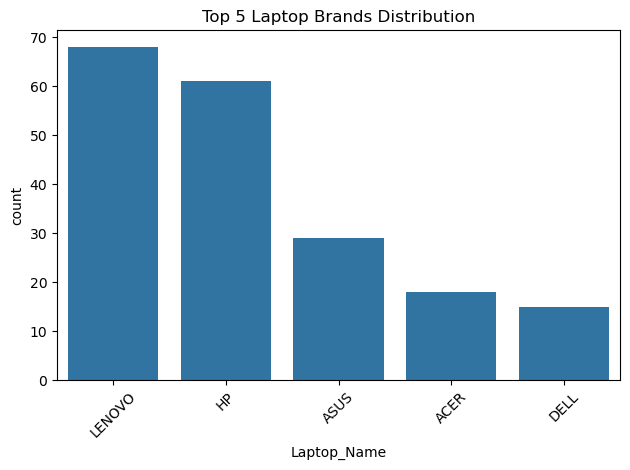

In [13]:
# the distribution of the top 10 most frequent laptop brands in the dataset.
top_5_brands = df_a['Laptop_Name'].value_counts().nlargest(5).index
df_top5 = df_a[df_a['Laptop_Name'].isin(top_5_brands
sns.countplot(data=df_top5, x='Laptop_Name', order=top_5_brands)
plt.title('Top 5 Laptop Brands Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

###### Histogram – Price Distribution

Text(0.5, 1.0, 'Laptop Price Distribution')

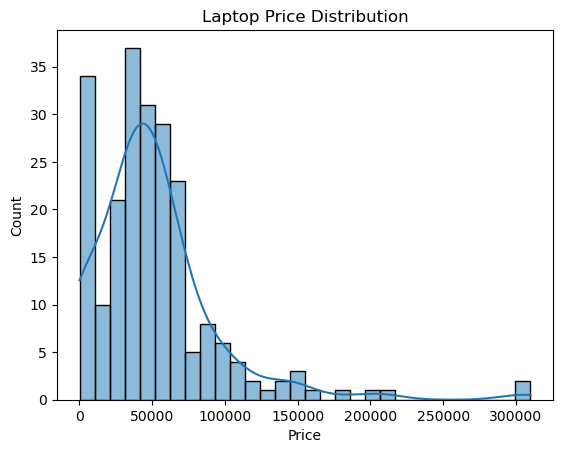

In [14]:
# Reveals pricing trends and outliers — helps identify budget vs premium segments.
sns.histplot(df_a['Price'], bins=30, kde=True)
plt.title('Laptop Price Distribution')

##### Laptop Brands Distribution

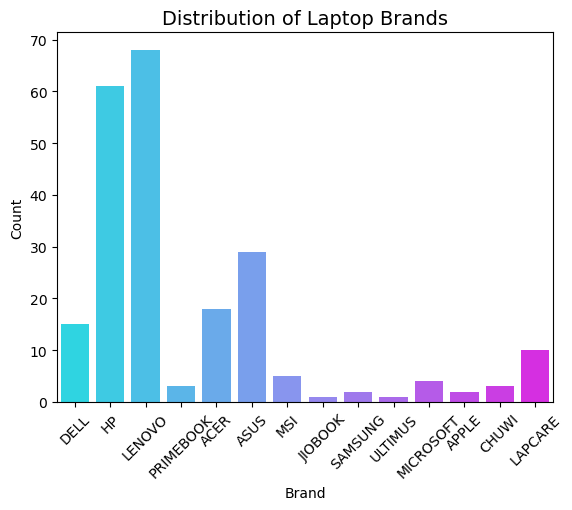

In [25]:
# Dell and HP are the most frequent brands, showing they dominate the dataset. ASUS and Lenovo follow closely.
sns.countplot(data=df_a, x='Laptop_Name', hue='Laptop_Name', palette='cool', legend=False)
plt.title('Distribution of Laptop Brands', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### RAM Distribution

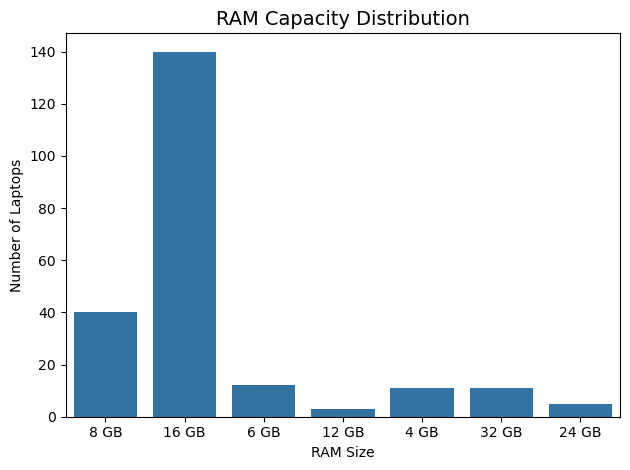

In [29]:

sns.countplot(data=df_a, x='Ram', color='tab:blue')
plt.title('RAM Capacity Distribution', fontsize=14)
plt.xlabel('RAM Size')
plt.ylabel('Number of Laptops')
plt.tight_layout()
plt.show()


##### Price distribution

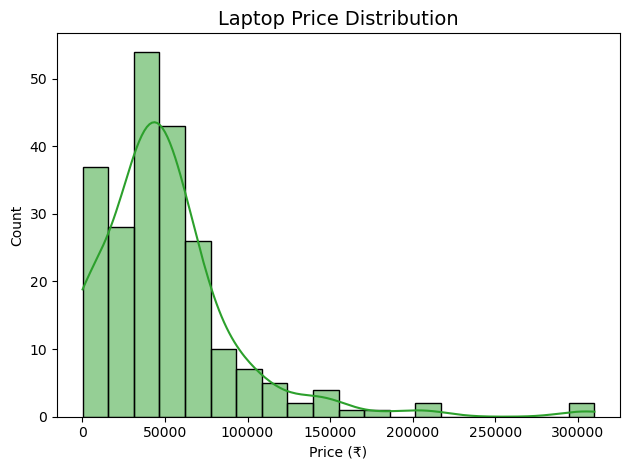

In [30]:
# Most laptops fall in the ₹40,000–₹70,000 range — indicating a focus on mid-range market products.
sns.histplot(df_a['Price'], bins=20, kde=True, color='tab:green')
plt.title('Laptop Price Distribution', fontsize=14)
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##### Rating distribution

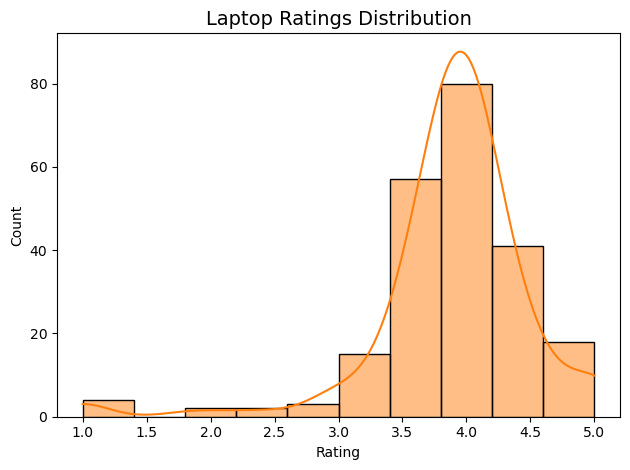

In [31]:
# Rating Distribution
sns.histplot(df_a['Rating'], bins=10, kde=True, color='tab:orange')
plt.title('Laptop Ratings Distribution', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Bivariate Analysis

##### Brand vs Average Price

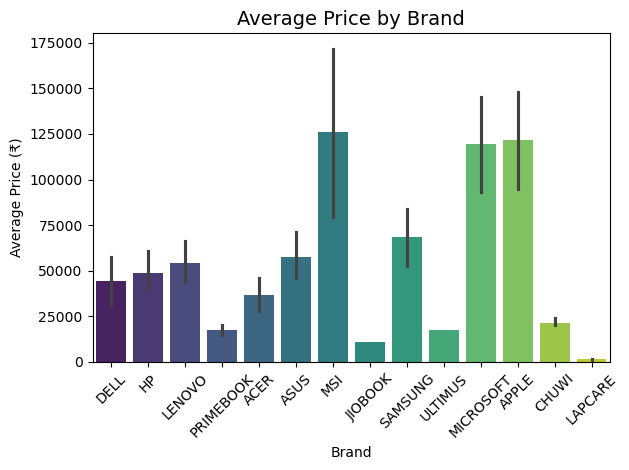

In [32]:
# Microsoft laptops have the highest average prices, while Acer and Lenovo offer more budget-friendly options.
sns.barplot(data=df_a, x='Laptop_Name', y='Price', estimator='mean',
            hue='Laptop_Name', palette='viridis', dodge=False, legend=False)
plt.title('Average Price by Brand', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### RAM vs Price

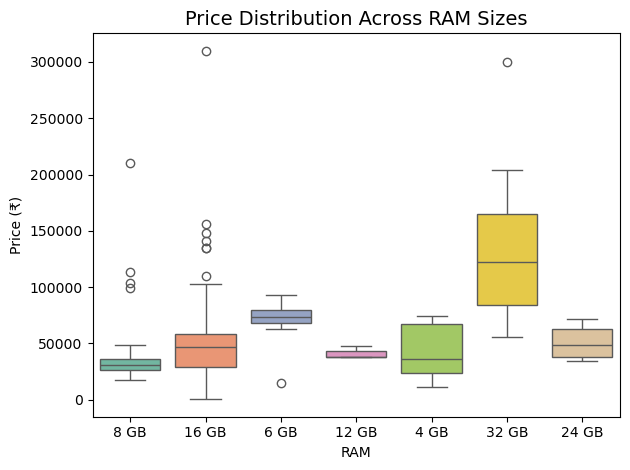

In [34]:
# Laptops with higher RAM, especially 16 GB, are priced significantly higher than lower RAM models.
sns.boxplot(data=df_a, x='Ram', y='Price', hue='Ram', palette='Set2', dodge=False, legend=False)
plt.title('Price Distribution Across RAM Sizes', fontsize=14)
plt.xlabel('RAM')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.show()


##### Processor Type vs Price

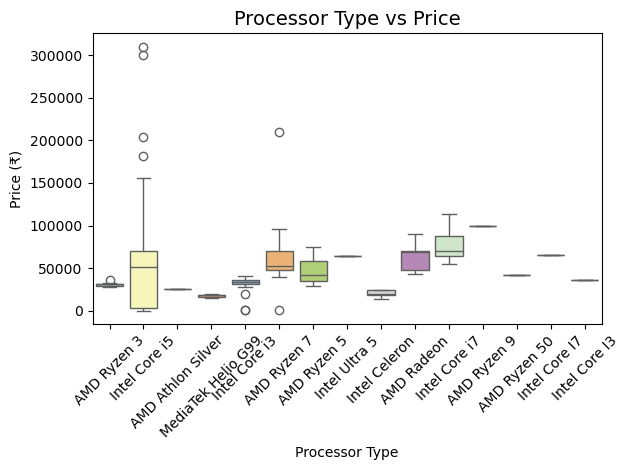

In [36]:
# Intel Core i7 and AMD Ryzen 7 laptops are the most expensive, reflecting their high-performance processors.
sns.boxplot(data=df_a, x='Core', y='Price', hue='Core', palette='Set3', dodge=False, legend=False)
plt.title('Processor Type vs Price', fontsize=14)
plt.xlabel('Processor Type')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Rating vs Price

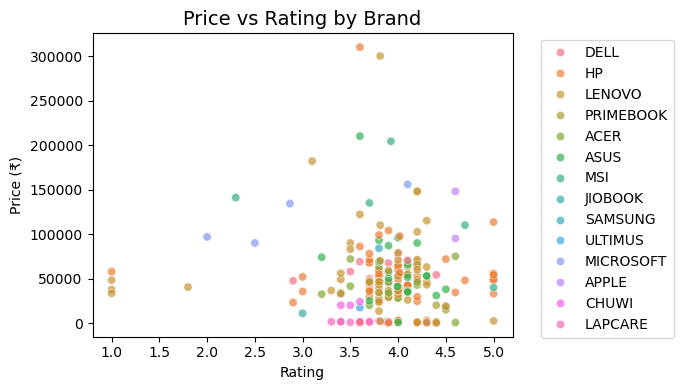

In [42]:
# Ratings remain consistently high across all price ranges, showing that even budget laptops get good user feedback.
plt.figure(figsize=(7,4))
sns.scatterplot(data=df_a, x='Rating', y='Price', hue='Laptop_Name', alpha=0.7)
plt.title('Price vs Rating by Brand', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### MultiVariate Analysis

##### Brand, RAM, and Price

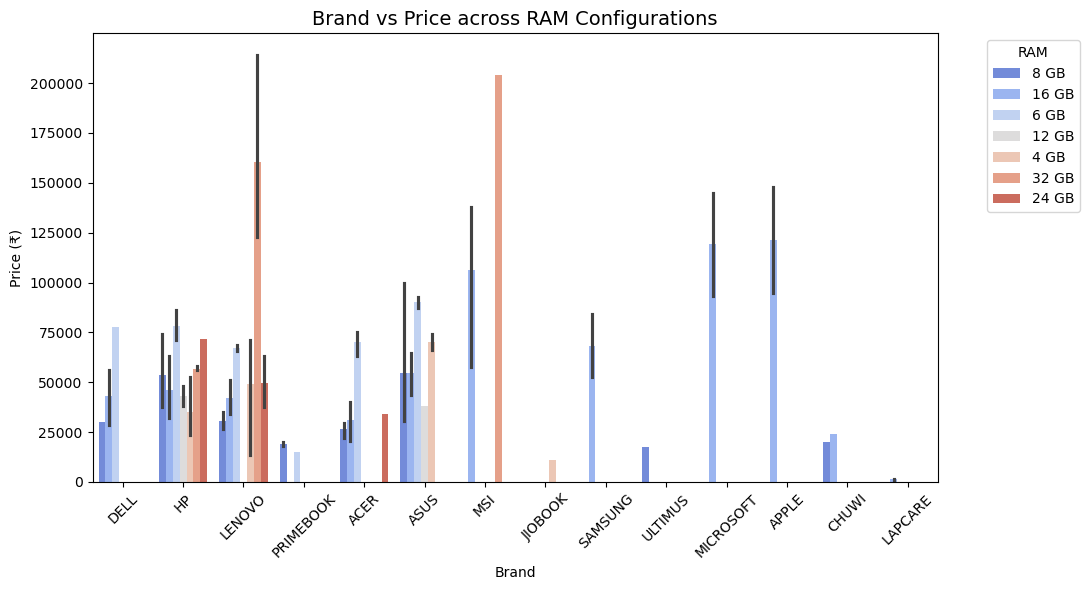

In [44]:
# In every brand, laptops with 16 GB RAM are costlier than 8 GB models, confirming that RAM directly impacts price.
plt.figure(figsize=(11,6))
sns.barplot(data=df_a, x='Laptop_Name', y='Price', hue='Ram', palette='coolwarm')
plt.title('Brand vs Price across RAM Configurations', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.legend(title='RAM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### Correlation Heatmap

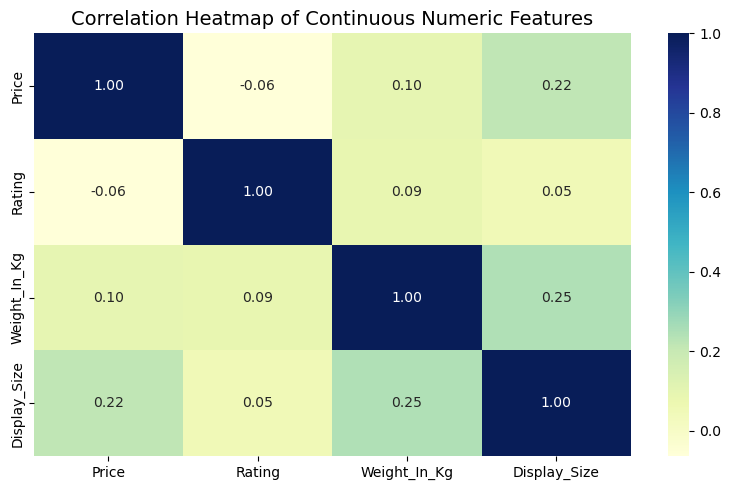

In [59]:
# Price shows a moderate positive correlation with display size and rating, indicating that larger and higher-rated laptops are generally more expensive.
plt.figure(figsize=(8,5))
numeric_cols = ['Price', 'Rating', 'Weight_In_Kg', 'Display_Size']
sns.heatmap(df_a[numeric_cols].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of Continuous Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()



##### Pairplot

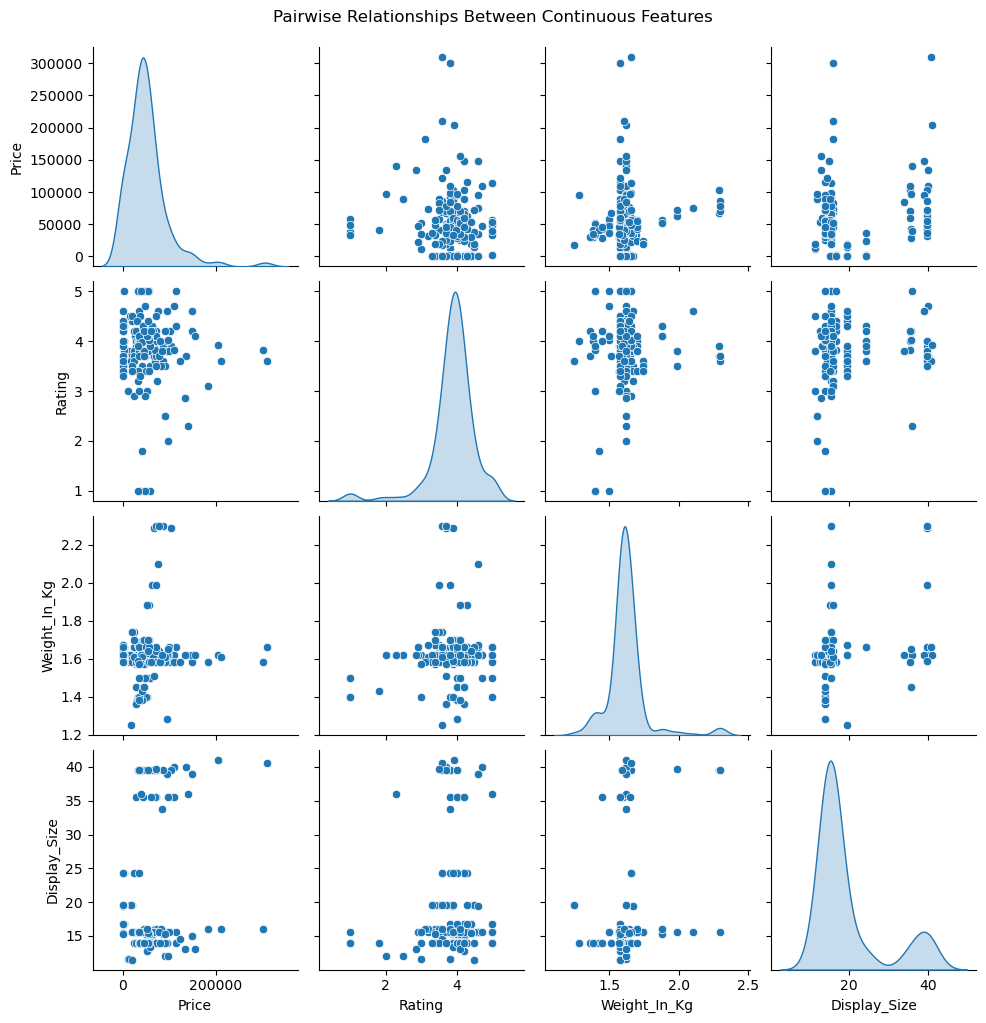

In [64]:
# Pairplot only for continuous numeric variables
sns.pairplot(df_a[['Price', 'Rating', 'Weight_In_Kg', 'Display_Size']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Continuous Features', y=1.02)
plt.show()
